<a href="https://colab.research.google.com/github/Animesh-Guchhait/Bayesian-Optimization-on-neural-network/blob/main/Bayesian_Optimization_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bayesian Optimization to find the optimal neural network architecture to classify the sign language digit dataset

Necessary Libraries:

In [ ]:
# standard data tools
import numpy as np
import pandas as pd

# common visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns

# CNN layers and the Deep Learning model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# splitting tool for the validation set
from sklearn.model_selection import train_test_split

# to block unnecesarry warnings for updates etc.
import warnings
warnings.filterwarnings("ignore")




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading data set

In [ ]:
## load .npy file

data_x = np.load('/content/drive/MyDrive/X.npy')
data_x.shape

data_y = np.load('/content/drive/MyDrive/Y.npy')
data_y.shape

(2062, 10)

In [ ]:
data_x.shape

(2062, 64, 64)

In [ ]:
# Since X is a .npy I will use manual ways to figure it out.

print(" Max value of X: ",data_x.max())
print(" Min value of X: ",data_x.min())
print(" Shape of X: ",data_x.shape)

print("\n Max value of Y: ",data_y.max())
print(" Min value of Y: ",data_y.min())
print(" Shape of Y: ",data_y.shape)

 Max value of X:  1.0
 Min value of X:  0.003921569
 Shape of X:  (2062, 64, 64)

 Max value of Y:  1.0
 Min value of Y:  0.0
 Shape of Y:  (2062, 10)


Train test split and reshaping 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        data_x, data_y, test_size=0.2, stratify=data_y)
X_train = X_train.reshape(-1,64,64,1)
X_test = X_test.reshape(-1,64,64,1)


Plotting each classes of image

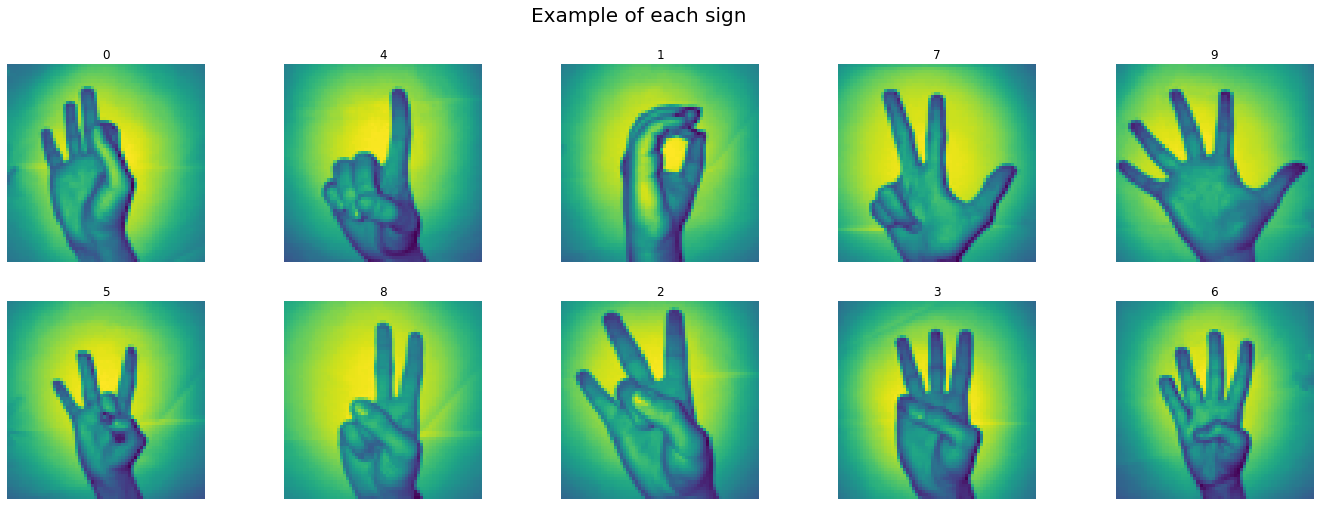

In [ ]:
plt.figure(figsize=(24,8))
X=data_x
Y=data_y
plt.subplot(2,5,1)
plt.title(Y[0].argmax())
plt.imshow(X[0])
plt.axis("off")

plt.subplot(2,5,2)
plt.title(Y[1000].argmax())
plt.imshow(X[1000])
plt.axis("off")

plt.subplot(2,5,3)
plt.title(Y[222].argmax())
plt.imshow(X[222])
plt.axis("off")

plt.subplot(2,5,4)
plt.title(Y[1500].argmax())
plt.imshow(X[1500])
plt.axis("off")

plt.subplot(2,5,5)
plt.title(Y[2000].argmax())
plt.imshow(X[2000])
plt.axis("off")

plt.subplot(2,5,6)
plt.title(Y[1200].argmax())
plt.imshow(X[1200])
plt.axis("off")

plt.subplot(2,5,7)
plt.title(Y[1700].argmax())
plt.imshow(X[1700])
plt.axis("off")

plt.subplot(2,5,8)
plt.title(Y[500].argmax())
plt.imshow(X[500])
plt.axis("off")

plt.subplot(2,5,9)
plt.title(Y[700].argmax())
plt.imshow(X[700])
plt.axis("off")

plt.subplot(2,5,10)
plt.title(Y[1400].argmax())
plt.imshow(X[1400])
plt.axis("off")

plt.suptitle("Example of each sign", fontsize=20)
plt.show()


Definig CNN model with default parameters h0=0.2, h1=128, h2=64, h3=40

In [ ]:
def make_model(h0=0.2,h1=128,h2=64,h3=40):

  # for default case h0=0.2,h1=128,h2=64,h3=40
  CNN_model = Sequential()
  CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
  CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
  CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

  CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
  CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
  CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

  CNN_model.add(Dropout(h0))

  CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
  CNN_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
  CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

  CNN_model.add(Dropout(h0))

  CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
  CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

  CNN_model.add(Dropout(h0))

  CNN_model.add(Flatten())

  CNN_model.add(Dense(h1,activation="relu"))
  CNN_model.add(Dense(h2,activation="relu"))
  CNN_model.add(Dense(h3,activation="relu"))

  CNN_model.add(Dense(10,activation="softmax"))
  return CNN_model




In [ ]:
np.random.seed(seed=42) # introducing fix random seed to produce same result 

Fitting the CNN model with default parameters

In [ ]:
model=make_model()
model.compile(optimizer=Adam(lr=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
result=model.fit(X_train,y_train,epochs=70,validation_data=(X_test,y_test))

Epoch 1/70
52/52 [==============================] - 3s 40ms/step - loss: 2.3036 - accuracy: 0.0885 - val_loss: 2.3025 - val_accuracy: 0.0993
Epoch 2/70
52/52 [==============================] - 2s 33ms/step - loss: 2.3026 - accuracy: 0.1079 - val_loss: 2.3021 - val_accuracy: 0.1065
Epoch 3/70
52/52 [==============================] - 2s 33ms/step - loss: 2.3012 - accuracy: 0.1073 - val_loss: 2.2973 - val_accuracy: 0.1332
Epoch 4/70
52/52 [==============================] - 2s 33ms/step - loss: 2.2146 - accuracy: 0.1928 - val_loss: 1.8028 - val_accuracy: 0.3777
Epoch 5/70
52/52 [==============================] - 2s 33ms/step - loss: 1.5773 - accuracy: 0.4415 - val_loss: 1.1397 - val_accuracy: 0.6320
Epoch 6/70
52/52 [==============================] - 2s 33ms/step - loss: 1.2206 - accuracy: 0.5785 - val_loss: 1.0619 - val_accuracy: 0.6925
Epoch 7/70
52/52 [==============================] - 2s 33ms/step - loss: 0.9717 - accuracy: 0.6604 - val_loss: 0.6924 - val_accuracy: 0.7893
Epoch 8/70
52

Using default parameters, we got 97.58% accuracy on our test data set.

Accuracy and loss plot for train and test data set.

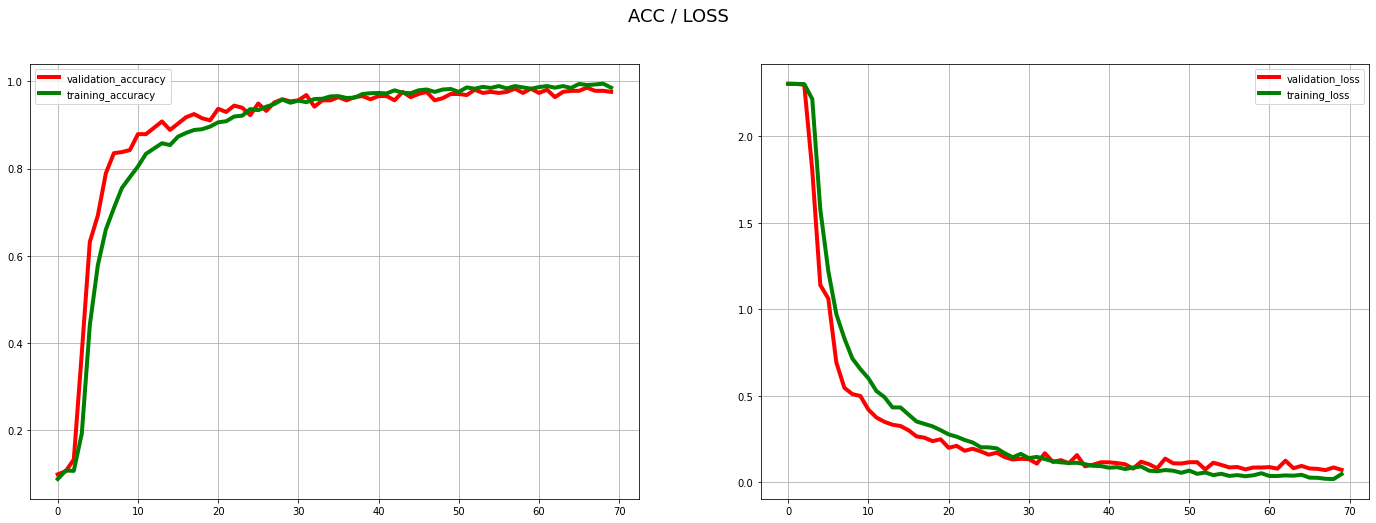

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(result.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(result.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(result.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(result.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()


Install skopt library 

In [ ]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-_4j1ljy_
  Running command git clone -q https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-_4j1ljy_
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.0-py2.py3-none-any.whl size=100268 sha256=4876b4b96a7fdc12bdd1281ff4b62da606dd2f4578fa6207f14d669a2421dde3
  Stored in directory: /tmp/pip-ephem-wheel-cache-zetjo_76/wheels/d6/9e/e3/8818f5597f06caa60393811f8aa57eb87b8565d772046d1b72
Successfully built scikit-optimize


In [ ]:
# import from skopt
from skopt import gp_minimize
from skopt.plots import plot_convergence
from skopt.space import Integer, Real
from skopt.utils import use_named_args

Now we will tune some hyperparameters using bayesian optimization.

Choosed hyperparameters are:
1. Dropout in range (.15,.25)
2. Number of node in 1st dense layer in range (4,256) 
3. Number of node in 2nd dense layer in range (4,256) 
4. Number of node in 3rd dense layer in range (4,256)
5. Number of epochs in range (30,80)
6. Learning rate in range (30,80)
7. Batch size in range (4,100)


In [ ]:
h0=Real(low=.15,high=.25,name='h0')      # Dropout in range (.15,.25)
h1 = Integer(low=4, high=256,name='h1')  # Number of node in 1st dense layer in range (4,256) 
h2 = Integer(low=4, high=256,name='h2')  # Number of node in 2nd dense layer in range (4,256) 
h3 = Integer(low=4, high=256,name='h3')  # Number of node in 3rd dense layer in range (4,256) 

d_ep = Integer(low=30, high=80,name='ep')  # Number of epochs in range (30,80)
d_lr = Real(low=1e-6, high=1e-1, prior='log-uniform',name='lr' )  #  Learning rate in range (30,80)
d_bs=Integer(low=4,high=100,name='bs')  # Batch size in range (4,100)

In [ ]:
dimensions = [h0,h1,h2,h3,d_ep,d_lr,d_bs]  # all search-dimensions into a single list

Accuracy_after_fit gives negative test accuracy of our CNN model for diffrent hyperparameters

In [ ]:
@use_named_args(dimensions=dimensions)
def accuracy_after_fit(h0=.2,h1 = 128, h2 = 64, h3 = 40, ep = 70, lr=0.0002,bs=52):
  model = make_model(h0,h1,h2,h3)
  model.compile(optimizer=Adam(lr=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
  results = model.fit(X_train,y_train,epochs=ep,batch_size=bs,validation_data=(X_test,y_test))
  del model
  return -1*results.history["val_accuracy"][-1]
 

In [ ]:
default_parameters=[.2,128,64,40,70,.0002,52] # Default parameter for our CNN model

Using gp_minimize ,we have tried to find optimial parameters where accuracy_after_fit gives the minimum value.

In [ ]:
search_result = gp_minimize(func=accuracy_after_fit,
                            dimensions=dimensions,
                            acq_func='EI', # Expected Improvement.
                            n_calls=31,
                            x0=default_parameters)

Epoch 1/70
32/32 [==============================] - 5s 83ms/step - loss: 2.3029 - accuracy: 0.0970 - val_loss: 2.3024 - val_accuracy: 0.1041
Epoch 2/70
32/32 [==============================] - 2s 54ms/step - loss: 2.3025 - accuracy: 0.1037 - val_loss: 2.3017 - val_accuracy: 0.1017
Epoch 3/70
32/32 [==============================] - 2s 53ms/step - loss: 2.3013 - accuracy: 0.1128 - val_loss: 2.2979 - val_accuracy: 0.2155
Epoch 4/70
32/32 [==============================] - 2s 55ms/step - loss: 2.2798 - accuracy: 0.1662 - val_loss: 2.1953 - val_accuracy: 0.2446
Epoch 5/70
32/32 [==============================] - 2s 55ms/step - loss: 1.9384 - accuracy: 0.3105 - val_loss: 1.4638 - val_accuracy: 0.5036
Epoch 6/70
32/32 [==============================] - 2s 53ms/step - loss: 1.4943 - accuracy: 0.4615 - val_loss: 1.2103 - val_accuracy: 0.6053
Epoch 7/70
32/32 [==============================] - 1s 46ms/step - loss: 1.2337 - accuracy: 0.5670 - val_loss: 1.0065 - val_accuracy: 0.6683
Epoch 8/70
32

 optimization progress visualization

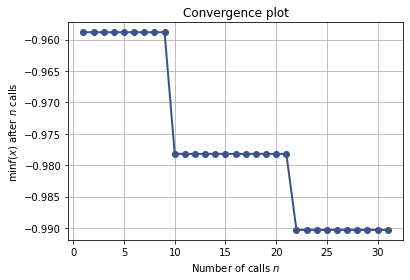

In [ ]:
plot_convergence(search_result) 

Best optimal parameter

In [ ]:
search_result.x

[0.18917563735345477, 217, 222, 222, 76, 0.00042887691355489744, 9]

Best sorted hyper-parameters and fitness values.

In [ ]:
sorted(zip(search_result.func_vals, search_result.x_iters))

[(-0.990314781665802,
  [0.18917563735345477, 217, 222, 222, 76, 0.00042887691355489744, 9]),
 (-0.980629563331604,
  [0.1711000789591049, 184, 256, 256, 75, 0.00023456020013905347, 4]),
 (-0.9782082438468933,
  [0.19959699921864824, 256, 256, 256, 80, 0.0004301527886744142, 76]),
 (-0.9782082438468933,
  [0.20615351065060017, 191, 127, 4, 80, 4.7061801910481997e-05, 4]),
 (-0.9782082438468933,
  [0.20696587391642948, 196, 195, 223, 80, 0.00017269607890012056, 36]),
 (-0.9782082438468933,
  [0.20704439744053996, 135, 246, 217, 67, 0.0004994139416350949, 60]),
 (-0.9782082438468933,
  [0.24631330137096083, 214, 128, 119, 71, 0.00014414719083800652, 12]),
 (-0.9733656048774719,
  [0.17623447113423701, 124, 205, 249, 80, 0.0001269490263248098, 49]),
 (-0.9709442853927612,
  [0.1987540362651365, 164, 256, 256, 73, 0.00031136078416293283, 61]),
 (-0.9685230255126953, [0.15, 105, 170, 78, 80, 0.00015511543822575575, 57]),
 (-0.9661017060279846, [0.15, 87, 132, 89, 30, 0.0002781295569366652, 

Fit the CNN model on best hyperparameter choice 

h0=0.18917563735345477, h1=217, h2=222, h3=222, ep= 76, lr=0.00042887691355489744, bs=9

In [ ]:
model=make_model(0.18917563735345477, 217, 222, 222)
model.compile(optimizer=Adam(lr=0.00042887691355489744),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
result=model.fit(X_train,y_train,epochs=76,batch_size=9,validation_data=(X_test,y_test))

Epoch 1/76
184/184 [==============================] - 5s 17ms/step - loss: 2.3039 - accuracy: 0.1013 - val_loss: 2.3026 - val_accuracy: 0.1017
Epoch 2/76
184/184 [==============================] - 3s 15ms/step - loss: 2.3032 - accuracy: 0.0861 - val_loss: 2.3026 - val_accuracy: 0.0993
Epoch 3/76
184/184 [==============================] - 3s 15ms/step - loss: 2.3030 - accuracy: 0.0940 - val_loss: 2.3026 - val_accuracy: 0.0993
Epoch 4/76
184/184 [==============================] - 3s 15ms/step - loss: 2.3030 - accuracy: 0.0800 - val_loss: 2.3025 - val_accuracy: 0.1380
Epoch 5/76
184/184 [==============================] - 3s 15ms/step - loss: 2.3041 - accuracy: 0.0891 - val_loss: 2.3029 - val_accuracy: 0.0993
Epoch 6/76
184/184 [==============================] - 3s 15ms/step - loss: 1.8602 - accuracy: 0.2868 - val_loss: 1.2958 - val_accuracy: 0.4891
Epoch 7/76
184/184 [==============================] - 3s 15ms/step - loss: 0.8662 - accuracy: 0.6998 - val_loss: 0.5282 - val_accuracy: 0.8208

So, Here we got 98.06% test accuracy

Accuracy and loss plot for train and test data set.

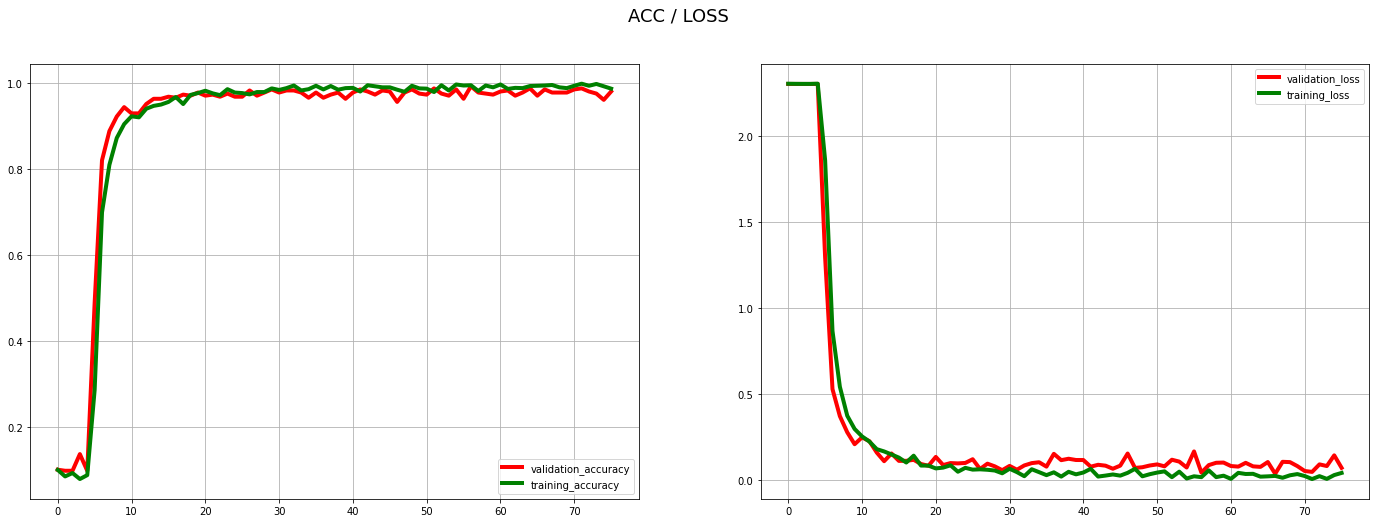

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(result.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(result.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(result.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(result.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

Fit the CNN model on 2nd best hyperparameter choice 

h0=0.1711000789591049,h1= 184,h2= 256, h3=256,ep=75, lr=0.00023456020013905347,bs= 4

In [ ]:
# 0.1711000789591049, 184, 256, 256, 75, 0.00023456020013905347, 4
model=make_model(0.1711000789591049, 184, 256, 256)
model.compile(optimizer=Adam(lr=0.00023456020013905347),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])
result=model.fit(X_train,y_train,epochs=75,batch_size=4,validation_data=(X_test,y_test))

Epoch 1/75
413/413 [==============================] - 7s 13ms/step - loss: 2.3040 - accuracy: 0.0891 - val_loss: 2.3025 - val_accuracy: 0.0993
Epoch 2/75
413/413 [==============================] - 5s 12ms/step - loss: 1.9751 - accuracy: 0.2492 - val_loss: 1.4390 - val_accuracy: 0.4383
Epoch 3/75
413/413 [==============================] - 5s 12ms/step - loss: 0.9850 - accuracy: 0.6264 - val_loss: 0.6260 - val_accuracy: 0.7772
Epoch 4/75
413/413 [==============================] - 5s 12ms/step - loss: 0.5270 - accuracy: 0.8223 - val_loss: 0.2791 - val_accuracy: 0.8910
Epoch 5/75
413/413 [==============================] - 6s 15ms/step - loss: 0.3670 - accuracy: 0.8769 - val_loss: 0.2426 - val_accuracy: 0.9249
Epoch 6/75
413/413 [==============================] - 6s 15ms/step - loss: 0.2581 - accuracy: 0.9193 - val_loss: 0.1822 - val_accuracy: 0.9298
Epoch 7/75
413/413 [==============================] - 7s 16ms/step - loss: 0.2312 - accuracy: 0.9303 - val_loss: 0.1972 - val_accuracy: 0.9346

Here we got 98.55% test accuracy 

Accuracy and loss plot for train and test data set.

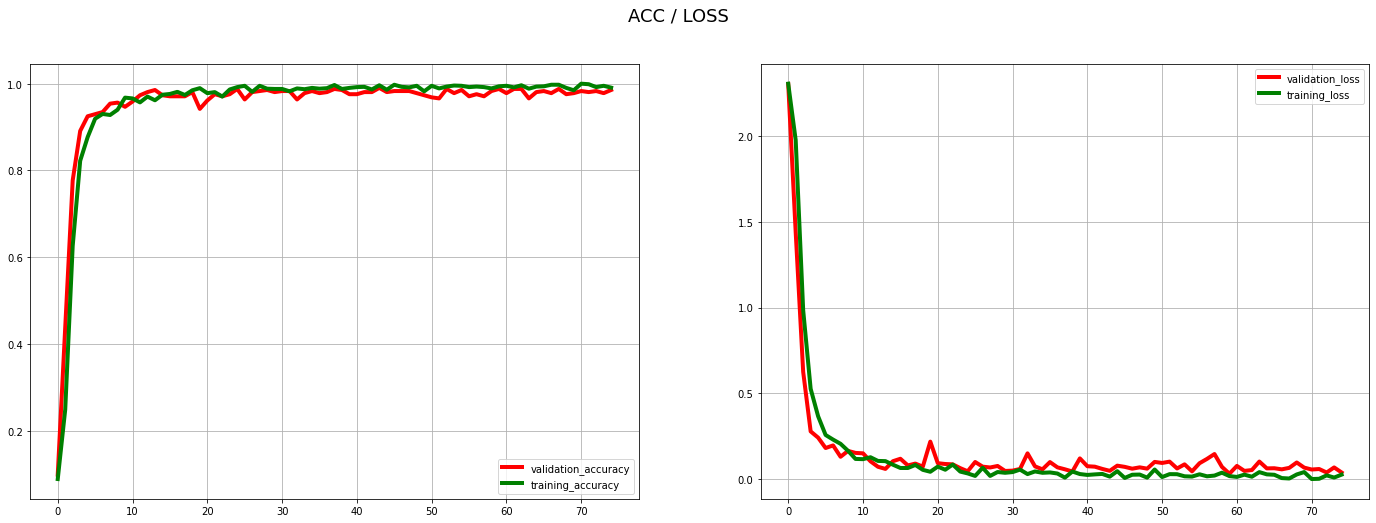

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(result.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(result.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(result.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(result.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

So, Our default parameter model has 97.58% accuracy and using bayesian optimization on some hyperparameter, we got two best accuracy of 99.03% and 98.06%.

So then We have modeled with those two best hyperparameters sets again and we have got 98.06% and 98.55% accuracy on test data. So, We can expect that using one of these hyperparameters sets,we get some extra accuracy than our default one.